# Monte Carlo Estimation Suboptimality

We examine the loss in social welfare due to using Monte Carlo estimation.

In [1]:
import sys
import random

# add library to path (or else, src not visible)
sys.path.insert(0, "../../")

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd

from src.AllocationSolver import AllocationSolver
from src.dists import SymmetricDiscreteDistribution, Distribution, UniformDistribution, NormalDistribution, ParetoDistribution
from src.plots import plot_alpha_versus_lambda, plot_Z_versus_lambda
from src.random_problem import generate_random_problem, generate_normal_distribution, generate_pareto_distribution

# use seaborn style plotting for poster presentation
sns.set_context("paper")
sns.set_style("whitegrid")

In [2]:
random.seed(0)
np.random.seed(0)

num_samples = 100
range_n = range(2, 9)
mc_errors = np.zeros((len(range_n), num_samples))

# for i, n in enumerate(range_n):
#     print(f"Running for n={n}")
#     for j in tqdm(range(num_samples)):
#         prob = AllocationSolver(
#             [
#                 generate_normal_distribution((1, 2), random.random() * 0.5, 5)()
#                 for _ in range(n)
#             ],
#             initial_supply=sum([d.mean() for d in prob.demand_distributions]) * random.random() * 1.5,
#             alloc_step=0.01,
#             alpha=2,
#             allocation_method="lambda_time"
#         )
#         prob.optimize_lambda(tol=0.01, monte_carlo=True)
#         Z_mc = prob.solve()[0]
#         prob.optimize_lambda(monte_carlo=False)
#         Z_lambda = prob.solve()[0]
        
#         mc_errors[i, j] = (abs(Z_lambda - Z_mc) / Z_lambda)

#     # save mc errors to file
#     np.save("mc_errors.npy", mc_errors)

Text(0.5, 1.0, 'Loss in Social Welfare from Monte Carlo Lambda Optimization')

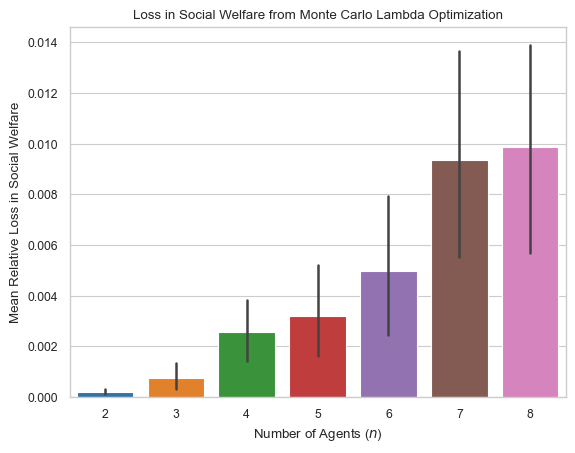

In [4]:
# read errors from file
mc_errors = np.load("mc_errors.npy")

# convert to pandas dataframe
mc_errors = pd.DataFrame(mc_errors.T, columns=range_n, index=range(num_samples))

# plot the errors
plt.figure()
# barplot
sns.barplot(mc_errors)
plt.xlabel(r"Number of Agents ($n$)")
plt.ylabel("Mean Relative Loss in Social Welfare")
plt.title("Loss in Social Welfare from Monte Carlo Lambda Optimization")